# Análise de Dados - Netflix

Para esse Business Case, vamos utilizar uma base de dados disponibilizada pela Netflix.

Sua tarefa é utilizar os conhecimentos adquiridos até agora para responder as perguntas abaixo.

O arquivo da base de dados está dispnível para download e também no site Kaggle.

[Link da base de dados - Kaggle](https://www.kaggle.com/datasets/shivamb/netflix-shows)

# Carregamento e tratamento dos dados

# Perguntas

In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [325]:
df = pd.read_csv('netflix.csv', parse_dates = ['date_added'])

In [326]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [328]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [330]:
df_tratado = df.copy()

In [331]:
df_tratado.columns= ['id', 'tipo', 'titulo', 'diretor', 'elenco', 'pais', 'dt_disponibilizacao',
       'ano_lancamento', 'classificacao', 'duracao', 'categorias', 'descricao']

In [332]:
df_tratado.head()

,id,tipo,titulo,diretor,elenco,pais,dt_disponibilizacao,ano_lancamento,classificacao,duracao,categorias,descricao
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### 1 - Quantos registros e quantas colunas existem no dataset?

In [333]:
df_tratado.shape

(8807, 12)

In [334]:
linhas, colunas = df_tratado.shape
print(f'Total de Linhas: {linhas}')
print(f'Total de colunas: {colunas}')

Total de Linhas: 8807
Total de colunas: 12


### 2- Existem colunas com valores ausentes? quais?
##### Resposta: Sim Colunas: Diretor, Elenco, Pais, data adicionada, classificação e duração

In [335]:
df_tratado.isna()

,id,tipo,titulo,diretor,elenco,pais,dt_disponibilizacao,ano_lancamento,classificacao,duracao,categorias,descricao
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [336]:
df_tratado.isna().sum()

id                        0
tipo                      0
titulo                    0
diretor                2634
elenco                  825
pais                    831
dt_disponibilizacao      10
ano_lancamento            0
classificacao             4
duracao                   3
categorias                0
descricao                 0
dtype: int64

In [337]:
# valores em  porcentagem % 
df_tratado.isna().sum() / linhas * 100

id                      0.000000
tipo                    0.000000
titulo                  0.000000
diretor                29.908028
elenco                  9.367549
pais                    9.435676
dt_disponibilizacao     0.113546
ano_lancamento          0.000000
classificacao           0.045418
duracao                 0.034064
categorias              0.000000
descricao               0.000000
dtype: float64

#### resposta: sim Colunas: diretor, elenco, pais, data adicionada, duração,classificação.

### 

## 3 - Quantas séries (TV Show) e quantos filmes (Movie) estão disponíveis?

In [339]:
df_tratado['tipo'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [340]:
df_tratado['tipo'].value_counts() 

tipo
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [341]:
df_tratado['tipo'].value_counts(normalize=True) * 100 

tipo
Movie      69.615079
TV Show    30.384921
Name: proportion, dtype: float64

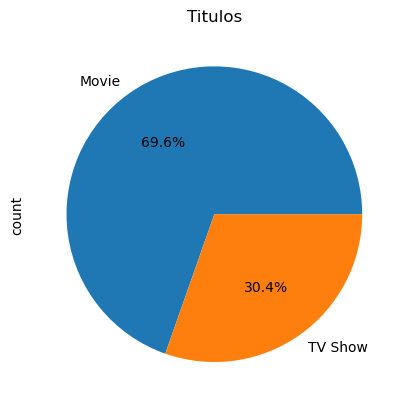

In [342]:
df_tratado['tipo'].value_counts().plot(kind='pie', title='Titulos', autopct='%1.1f%%');

In [343]:
df_tratado.head()

,id,tipo,titulo,diretor,elenco,pais,dt_disponibilizacao,ano_lancamento,classificacao,duracao,categorias,descricao
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 4 - Quantos registros no dataset estão sem o país especificado? Liste os seus tipos (filme ou série de tv) e quantidades.

In [344]:
df_sem_pais = df_tratado.loc[df_tratado['pais'].isna()]

In [345]:
df_sem_pais.shape

(831, 12)

In [346]:
df_sem_pais['tipo'].value_counts()

tipo
Movie      440
TV Show    391
Name: count, dtype: int64

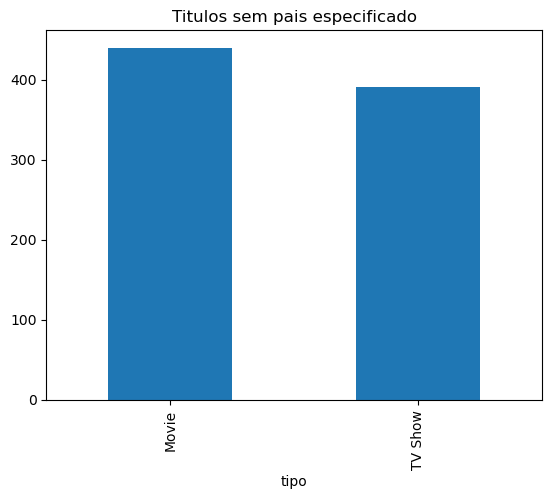

In [347]:
df_sem_pais['tipo'].value_counts().plot(kind='bar', title= 'Titulos sem pais especificado');

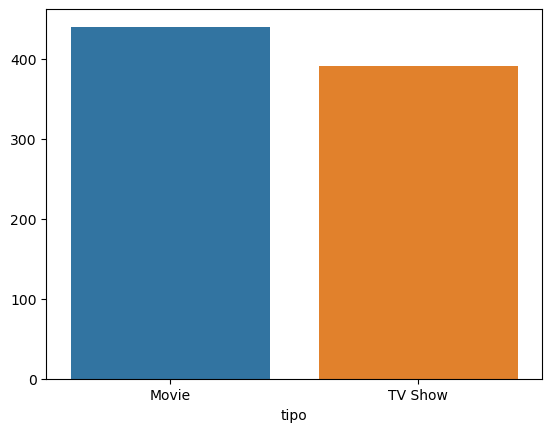

In [348]:
sns.barplot(x=df_sem_pais['tipo'].value_counts().index, y=df_sem_pais['tipo'].value_counts().values);

## 5 - Qual a data do primeiro filme disponibilizado e qual o seu título e país?
#Resposta: O primeiro filme foi  Frank and Cindy em 01/04/2016-pais USA.

In [349]:
df_movies = df_tratado.loc[df_tratado['tipo'] == 'Movie']

In [350]:
df_movies['dt_disponibilizacao'].min()

'April 1, 2016'

In [351]:
filtro = df_movies['dt_disponibilizacao'] == df_movies['dt_disponibilizacao'].min()
df_movies[filtro]

,id,tipo,titulo,diretor,elenco,pais,dt_disponibilizacao,ano_lancamento,classificacao,duracao,categorias,descricao
5854,s5855,Movie,Frank and Cindy,G.J. Echternkamp,NaN,United States,"April 1, 2016",2007,TV-MA,70 min,"Documentaries, Music & Musicals",Frank was a rising pop star when he married Ci...
7107,s7108,Movie,Iverson,Zatella Beatty,Allen Iverson,United States,"April 1, 2016",2014,NR,88 min,"Documentaries, Sports Movies",This unfiltered documentary follows the rocky ...
7124,s7125,Movie,Jeremy Scott: The People's Designer,Vlad Yudin,Jeremy Scott,United States,"April 1, 2016",2015,PG-13,109 min,Documentaries,The journey of fashion designer Jeremy Scott f...


## 6 - Qual o diretor com maior número de títulos (filme ou série)? Qual o seu país?
#### Rajiv Chilaka  pais india

In [352]:
df_tratado['diretor'].value_counts()

diretor
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: count, Length: 4528, dtype: int64

In [353]:
df_tratado.query("diretor == 'Rajiv Chilaka'")

,id,tipo,titulo,diretor,elenco,pais,dt_disponibilizacao,ano_lancamento,classificacao,duracao,categorias,descricao
406,s407,Movie,Chhota Bheem - Neeli Pahaadi,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies,Things get spooky when Bheem and his buddies t...
407,s408,Movie,Chhota Bheem & Ganesh,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2009,TV-Y7,68 min,Children & Family Movies,Bheem and Lord Ganesha join forces to save Dho...
408,s409,Movie,Chhota Bheem & Krishna: Mayanagari,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2011,TV-Y7,67 min,Children & Family Movies,Young lord Krishna has fallen for demoness Maa...
409,s410,Movie,Chhota Bheem & Krishna: Pataliputra- City of t...,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2010,TV-Y7,66 min,Children & Family Movies,Krishna needs Bheem’s help: The ruined city of...
410,s411,Movie,Chhota Bheem And The Broken Amulet,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies,When a stranger tries to steal an amulet from ...
411,s412,Movie,Chhota Bheem And The Crown of Valhalla,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies,To save the kingdom of Valhalla from invasion ...
412,s413,Movie,Chhota Bheem and the Incan Adventure,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2013,TV-Y7,65 min,Children & Family Movies,"When Dholakpur’s princess is kidnapped, Bheem ..."
413,s414,Movie,Chhota Bheem and The ShiNobi Secret,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies,After learning of a samurai village under thre...
414,s415,Movie,Chhota Bheem Aur Hanuman,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2012,TV-Y7,68 min,Children & Family Movies,When two evil entities kidnap a princess in a ...
415,s416,Movie,Chhota Bheem aur Krishna,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"July 22, 2021",2009,TV-Y7,68 min,Children & Family Movies,"Centuries after the end of a conqueror's rule,..."


## 7 - Qual é o filme de maior duração? E o de menor duração?

In [354]:
df_tratado.head()

,id,tipo,titulo,diretor,elenco,pais,dt_disponibilizacao,ano_lancamento,classificacao,duracao,categorias,descricao
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [355]:
df_tratado_movie = df_tratado.query("tipo == 'Movie'").copy()

In [356]:
df_tratado_movie.loc[df_tratado_movie['duracao'].isna()]

,id,tipo,titulo,diretor,elenco,pais,dt_disponibilizacao,ano_lancamento,classificacao,duracao,categorias,descricao
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [357]:
df_tratado_movie.loc[[5541, 5795, 5813], 'duracao'] = ['74 min', '84 min', '66 min']

In [358]:
df_tratado_movie.loc[[5541, 5795, 5813], 'classificacao'] = np.nan

In [359]:
df_tratado_movie['duracao_min'] = df_tratado_movie['duracao'].str.replace('min', '')

In [360]:
df_tratado_movie.head()

,id,tipo,titulo,diretor,elenco,pais,dt_disponibilizacao,ano_lancamento,classificacao,duracao,categorias,descricao,duracao_min
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127


In [361]:
df_tratado_movie['duracao_min'].max

<bound method Series.max of 0        90 
6        91 
7       125 
9       104 
12      127 
        ... 
8801     96 
8802    158 
8804     88 
8805     88 
8806    111 
Name: duracao_min, Length: 6131, dtype: object>

In [362]:
df_tratado_movie['duracao_min'].sort_values(ascending=False)

4096     99 
6626     99 
4512     99 
5529     99 
1663     99 
        ... 
1796    100 
8562    100 
8091    100 
3535     10 
5794     NaN
Name: duracao_min, Length: 6131, dtype: object

In [363]:
df_tratado_movie.loc[1663]

id                                                                 s1664
tipo                                                               Movie
titulo                            Dolly Parton’s Christmas on the Square
diretor                                                     Debbie Allen
elenco                 Dolly Parton, Christine Baranski, Treat Willia...
pais                                                       United States
dt_disponibilizacao                                    November 22, 2020
ano_lancamento                                                      2020
classificacao                                                      TV-PG
duracao                                                           99 min
categorias                    Children & Family Movies, Music & Musicals
descricao              Seasonal cheer comes to a screeching halt when...
duracao_min                                                          99 
Name: 1663, dtype: object

## 8 - Qual o tempo médio de duração de um filme?

In [364]:
df_tratado_movie.head()

,id,tipo,titulo,diretor,elenco,pais,dt_disponibilizacao,ano_lancamento,classificacao,duracao,categorias,descricao,duracao_min
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127


In [365]:
sns.boxplot(x=df_tratado_movie['duracao_min'])

TypeError: Horizontal orientation requires numeric `x` variable.

In [ ]:
df_tratado_movie['duracao_min'].sort_values(ascending=False)

4096     99 
6626     99 
4512     99 
5529     99 
1663     99 
        ... 
1796    100 
8562    100 
8091    100 
3535     10 
5794     NaN
Name: duracao_min, Length: 6131, dtype: object

In [ ]:
df_tratado_movie.drop('duracao_min', axis=1, inplace=True)

In [ ]:
round(df_tratado_movie['duracao_min'].mean(),2)

KeyError: 'duracao_min'

## 9 - Liste os 3 países que produzem a maior quantidade de Séries (TV Show).

In [ ]:
df_tratado['pais']

0       United States
1        South Africa
2                 NaN
3                 NaN
4               India
            ...      
8802    United States
8803              NaN
8804    United States
8805    United States
8806            India
Name: pais, Length: 8807, dtype: object

In [ ]:
df_tratado['pais'].isna().sum()

831

In [ ]:
# Os 3 Paises que mais produzem séries de TV são Estado Unidos, Reino Unido e Japao
df_tratado.loc[df_tratado['tipo'] =='TV Show', 'pais'].value_counts(dropna=True)

pais
United States                                    760
United Kingdom                                   213
Japan                                            169
South Korea                                      158
India                                             79
                                                ... 
Belarus                                            1
United Kingdom, Australia                          1
France, Australia, Germany                         1
Australia, New Zealand, United States              1
United States, France, South Korea, Indonesia      1
Name: count, Length: 196, dtype: int64

## 10 - Em qual ano  temos o maior número de séries e filmes brasileiros disponibilizados na Netflix?

In [ ]:
df_tratado_brasil = df_tratado.loc[df_tratado['pais'].notna() & df_tratado['pais'].str.contains('Brazil')].copy()

In [ ]:
df_tratado_brasil.head()

,id,tipo,titulo,diretor,elenco,pais,dt_disponibilizacao,ano_lancamento,classificacao,duracao,categorias,descricao
270,s271,Movie,Beckett,Ferdinando Cito Filomarino,"John David Washington, Boyd Holbrook, Alicia V...","Italy, Brazil, Greece","August 13, 2021",2021,TV-MA,110 min,Action & Adventure,An American tourist goes on the run in Greece ...
302,s303,Movie,City of God: 10 Years Later,"Cavi Borges, Luciano Vidigal",NaN,Brazil,"August 5, 2021",2013,TV-MA,69 min,"Documentaries, International Movies","A decade after the seminal Brazilian film ""Cit..."
650,s651,Movie,O Vendedor de Sonhos,Jayme Monjardim,"César Troncoso, Dan Stulbach, Thiago Mendonça,...",Brazil,"June 22, 2021",2016,TV-14,96 min,"Dramas, International Movies",A disillusioned psychologist tries to commit s...
783,s784,Movie,Carnaval,Leandro Neri,"Giovana Cordeiro, Gkay, Bruna Inocencio, Samya...",Brazil,"June 2, 2021",2021,TV-MA,95 min,"Comedies, International Movies, Music & Musicals","After a breakup, an influencer takes her frien..."
894,s895,Movie,Dance of the Forty One,David Pablos,"Alfonso Herrera, Emiliano Zurita, Mabel Cadena...","Mexico, Brazil","May 12, 2021",2021,TV-MA,99 min,"Dramas, Independent Movies, International Movies",A gay congressman marries the Mexican presiden...


In [ ]:
df_tratado_brasil['dt_disponibilizacao'].dt.year.value_counts()

AttributeError: Can only use .dt accessor with datetimelike values

## 11 - Qual(ais) o(s) diretor(es) brasileiro(s) com o maior número de títulos (filme/série)?
Resposta: Os diretores com maior numero de titulos são: Lucas Marutti e Diego Pignataro.

In [ ]:
df_tratado_brasil['diretor'].value_counts()

diretor
Lucas Margutti                  3
Diego Pignataro                 3
Marcelo Galvão                  2
Alexandre Avancini              2
Bruno Garotti                   2
                               ..
Petra Costa, Lea Glob           1
Wagner de Assis                 1
Fernando Ayllón                 1
Cavi Borges, Luciano Vidigal    1
Tiffanie Hsu                    1
Name: count, Length: 61, dtype: int64

## 12 - Existem mais conteúdos para adultos ou para crianças e adolescentes?

In [ ]:
df_tratado.head()

,id,tipo,titulo,diretor,elenco,pais,dt_disponibilizacao,ano_lancamento,classificacao,duracao,categorias,descricao
270,s271,Movie,Beckett,Ferdinando Cito Filomarino,"John David Washington, Boyd Holbrook, Alicia V...","Italy, Brazil, Greece","August 13, 2021",2021,TV-MA,110 min,Action & Adventure,An American tourist goes on the run in Greece ...
302,s303,Movie,City of God: 10 Years Later,"Cavi Borges, Luciano Vidigal",NaN,Brazil,"August 5, 2021",2013,TV-MA,69 min,"Documentaries, International Movies","A decade after the seminal Brazilian film ""Cit..."
650,s651,Movie,O Vendedor de Sonhos,Jayme Monjardim,"César Troncoso, Dan Stulbach, Thiago Mendonça,...",Brazil,"June 22, 2021",2016,TV-14,96 min,"Dramas, International Movies",A disillusioned psychologist tries to commit s...
783,s784,Movie,Carnaval,Leandro Neri,"Giovana Cordeiro, Gkay, Bruna Inocencio, Samya...",Brazil,"June 2, 2021",2021,TV-MA,95 min,"Comedies, International Movies, Music & Musicals","After a breakup, an influencer takes her frien..."
894,s895,Movie,Dance of the Forty One,David Pablos,"Alfonso Herrera, Emiliano Zurita, Mabel Cadena...","Mexico, Brazil","May 12, 2021",2021,TV-MA,99 min,"Dramas, Independent Movies, International Movies",A gay congressman marries the Mexican presiden...


In [ ]:
df_tratado['classificacao'].value_counts()

classificacao
TV-MA    59
TV-14    12
TV-PG     9
TV-G      4
TV-Y      3
PG        3
R         3
NR        2
PG-13     1
TV-Y7     1
Name: count, dtype: int64

In [ ]:
df_tratado['classificacao'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
adultos = ['TV-MA','R','NR ']
criancas_adolescente = ['TV-14','TV-PG ','TV-Y7','PG-13 ','TV-Y','TV-G ']

In [ ]:
df_tratado.query("classificacao in @adultos").shape

(4006, 12)

In [ ]:
df_tratado.query("classificacao in @criancas_adolescente").shape

(2801, 12)